### Code for the Twitter data - cleaning and organizing

In [2]:
import feather
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
tweets = pd.read_feather('june1-feb17.feather')

In [4]:
tweets.head(5)

,id,text,permalink,to,date,retweets,favorites,mentions,hashtags,geo,username
0,1134627092358881281,Bushfires in Australia Documentary https://you...,https://twitter.com/AmandhaAthukor1/status/113...,None,2019-06-01 01:05:53+00:00,0,0,@YouTube,,,AmandhaAthukor1
1,1134629919516839936,🎉 Congratulations on 2k! 🎉Theres bushfires rag...,https://twitter.com/Squidinkz/status/113462991...,simplycanadia_n,2019-06-01 01:17:07+00:00,0,0,,,,Squidinkz
2,1134641811543142400,The assumption is this was one people with a c...,https://twitter.com/telesynth_hot/status/11346...,AllNewsAlliance,2019-06-01 02:04:23+00:00,0,1,,,,telesynth_hot
3,1134660842580979713,Shades of miranda blaming the vic bushfires on...,https://twitter.com/ShaneB19/status/1134660842...,slpng_giants_oz,2019-06-01 03:20:00+00:00,1,3,,,,ShaneB19
4,1134759044147638273,Nope. I will not help. I will sit calmly & wat...,https://twitter.com/gsqv/status/11347590441476...,slpng_giants_oz,2019-06-01 09:50:13+00:00,0,0,,,,gsqv


/Users/annatakacs/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


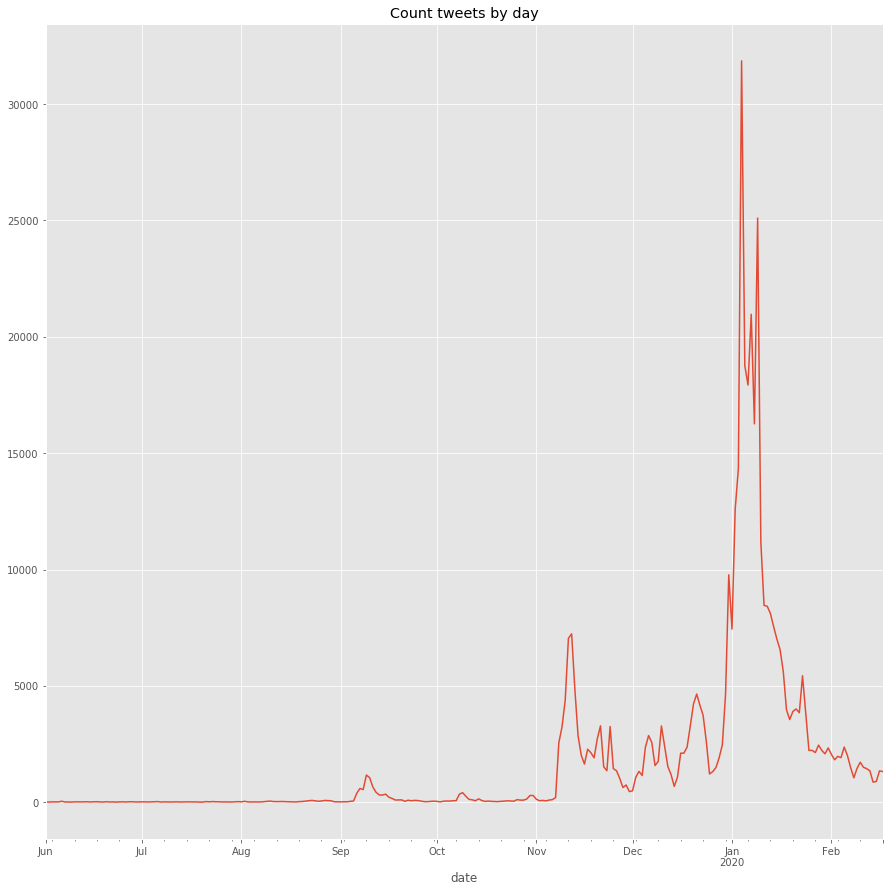

In [5]:
tweets.resample('D', on ='date')['id'].count().plot(kind='line',figsize = (15,15), title = 'Count tweets by day')

## Text cleaning

In [6]:
import re
import os
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

### Mentions

In [7]:
tweets['mentions'] = tweets['text'].apply(lambda x: ' '.join([item for item in x.split() if re.search('^@', item)]))
tweets['mention'] = tweets.text.str.findall(r'(?<![@\w])@(\w{1,50})').apply(', '.join)

### Hashtags

In [8]:
tweets['hashtags'] = tweets['text'].apply(lambda x: ' '.join([item for item in x.split() if re.search('^#', item)]))
tweets['hashtag'] = tweets.text.str.findall(r'(?<![@\w])#(\w{1,50})').apply(', '.join)

### Remove URL links

In [9]:
tweets['mention_URL'] = tweets.text.str.findall(r'(?:\@|https?\://)\S+').apply(' '.join)

### Remove mentions from the text column

In [10]:
regexp = r'(?:\@|https?\://)\S+'
tweets['text'] = tweets['text'].str.replace(regexp, '')

In [11]:
tweets.head(30)

,id,text,permalink,to,date,retweets,favorites,mentions,hashtags,geo,username,mention,hashtag,mention_URL
0,1134627092358881281,Bushfires in Australia Documentary via,https://twitter.com/AmandhaAthukor1/status/113...,None,2019-06-01 01:05:53+00:00,0,0,@YouTube,,,AmandhaAthukor1,YouTube,,https://youtu.be/9HGlRf9odvw @YouTube
1,1134629919516839936,🎉 Congratulations on 2k! 🎉Theres bushfires rag...,https://twitter.com/Squidinkz/status/113462991...,simplycanadia_n,2019-06-01 01:17:07+00:00,0,0,,,,Squidinkz,,,
2,1134641811543142400,The assumption is this was one people with a c...,https://twitter.com/telesynth_hot/status/11346...,AllNewsAlliance,2019-06-01 02:04:23+00:00,0,1,,,,telesynth_hot,,,
3,1134660842580979713,Shades of miranda blaming the vic bushfires on...,https://twitter.com/ShaneB19/status/1134660842...,slpng_giants_oz,2019-06-01 03:20:00+00:00,1,3,,,,ShaneB19,,,
4,1134759044147638273,Nope. I will not help. I will sit calmly & wat...,https://twitter.com/gsqv/status/11347590441476...,slpng_giants_oz,2019-06-01 09:50:13+00:00,0,0,,,,gsqv,,,
5,1134858706963668992,Australia is coming off its hottest summer eve...,https://twitter.com/Lobes/status/1134858706963...,bushplato,2019-06-01 16:26:15+00:00,0,1,,,,Lobes,,,
6,1134885387967401984,"We're not alone. ""In Australia, our fire seaso...",https://twitter.com/CarbonConvoCA/status/11348...,880Edmonton,2019-06-01 18:12:16+00:00,0,0,@OwenBushfire,,,CarbonConvoCA,OwenBushfire,,@OwenBushfire
7,1134950885853761536,"Growing up with bushfires and flash floods, th...",https://twitter.com/missbunnykins/status/11349...,None,2019-06-01 22:32:32+00:00,0,0,,,,missbunnykins,,,
8,1134954547883925505,Watching Skippy on Gem. Observations: 1. Who k...,https://twitter.com/_SallyHarding/status/11349...,None,2019-06-01 22:47:05+00:00,0,3,,,,_SallyHarding,,,
9,1135005773061222400,California bushfires increased wild weather ev...,https://twitter.com/duncanwc/status/1135005773...,bostock_jim,2019-06-02 02:10:38+00:00,0,0,,,,duncanwc,,,


## Date time

In [12]:
tweets["created"] = pd.to_datetime(tweets["date"])
tweets['month_created'] = tweets["created"].dt.month
tweets['day_created'] = tweets["created"].dt.day

In [26]:
tweets['date'] = tweets['date'].dt.to_pydatetime()

In [29]:
import datetime
tweets['date'] = datetime.date(tweets['date'])

TypeError: cannot convert the series to <class 'int'>

In [14]:
tweets.to_csv('tweets_clean.csv') 